## Remake/improve the existing visualization
In the folder 'visuals' you find 3 examples with the data and the original visualization. Start first with '1-weekly-road-fuel-prices'. What is good what is bad about the visualization? Can you do a better one? You can use the visualization tool of your choice (Excel, matplotlib,numbers, ...). Can you tell a story about the data? Why is the price dropping sharply from time to time?  
In case you you want to practice more, take a look at '2-sleep_hours_needed_vs_average' or '3-40-years_music_industry'.

## Create a word cloud using Scopus API

Create a word cloud by accessing the Scopus database with the Pybliometrics tool.  
You need to :
- register here (https://dev.elsevier.com) and get your own API key.
- install Pybliometrics on your local machine (<code>pip install pybliometrics</code>)

The documentation can be found here (https://pybliometrics.readthedocs.io/en/stable/index.html#classes)

In [ ]:
! pip install pybliometrics

In [1]:
import pandas as pd

First search the author or affiliation for which you want to create the word cloud:
The first time you use pybliometrics you will be ask to enter you API key, which will then be saved locally. Furthermore you need access to Scopus services: TU Dresden has a Scopus licence and when you are using the WIFI from the TU Dresden you should have also access. If you are NOT at TUD but you have a ZIH login, please do connect to the University services via VPN (here you can find how to set it up: https://tu-dresden.de/zih/dienste/service-katalog/arbeitsumgebung/zugang_datennetz/vpn)

In [2]:
# information for Affiliation search can be found here:
# https://pybliometrics.readthedocs.io/en/stable/reference/pybliometrics.AffiliationSearch.html

from pybliometrics.scopus import AffiliationSearch
tud = AffiliationSearch('AFFIL(TU DRESDEN)')

pd.DataFrame(tud.affiliations).head()

,eid,name,variant,documents,city,country,parent
0,10-s2.0-60018353,Technische Universität Dresden,,73061,Dresden,Germany,0
1,10-s2.0-60025676,Dresden University Faculty of Medicine and Uni...,University Hospital Carl Gustav Carus,18947,Dresden,Germany,0
2,10-s2.0-60102531,Center for Regenerative Therapies Dresden,Technische Universität Dresden,1465,Dresden,Germany,0
3,10-s2.0-60117057,Technische Universität Dresden Institut für Fe...,Technische Universität Dresden Institut Für Fe...,313,Dresden,Germany,0
4,10-s2.0-60017479,Herzzentrum Dresden Universitätsklinik,Herzzentrum Dresden,203,Dresden,Germany,0


Let us see what is the content connected to each affiliation. Therefore, you need to use the <code>eid<\code> number:

In [3]:
# Let us take a look at the entry 'Herzzentrum Dresden Universitätsklinik' 
# TU Dresden is big (73061 documents) and retrieving information will take some time
# so as an example the Herzzentrum in Dresden is  better:

from pybliometrics.scopus import ContentAffiliationRetrieval
content_herz = ContentAffiliationRetrieval('10-s2.0-60017479')

print (content_herz.author_count)

80


More output options can be found here (https://pybliometrics.readthedocs.io/en/stable/reference/pybliometrics.ContentAffiliationRetrieval.html)

In [4]:
# this gives you the search link to make a scopus search and get all the connected documents
# %28 stands for '('
content_herz.search_link

'https://api.elsevier.com/content/search/scopus?query=af-id%2860017479%29'

In [6]:
from pybliometrics.scopus import ScopusSearch
scopus_herz = ScopusSearch('af-id(60017479)',verbose=True)

# here we put the flag verbose=True to see the progress of the query
# more infos and options here: https://pybliometrics.readthedocs.io/en/stable/reference/pybliometrics.ScopusSearch.html
# note that the first part of the eid is deleted


In [7]:
len(scopus_herz.results)

203

In [8]:
# The second document found by Scopus for this affiliation id
scopus_herz.results[1]

Document(eid='2-s2.0-85086052311', doi='10.1093/europace/euaa004', pii=None, pubmed_id='32044994', title='A collective European experience with left atrial appendage suture ligation using the LARIAT+ device', subtype='ar', subtypeDescription='Article', creator='Tilz R.R.', afid='60106629;60026701;60025676;60024930;60023691;60022215;60021361;60019619;60015196;112698174', affilname='Deutsches Zentrum für Herz-Kreislauf-Forschung e. V.;Fuwai Hospital, Chinese Academy of Medical Sciences &amp; Peking Union Medical College;Dresden University Faculty of Medicine and University Hospital Carl Gustav Carus;Harefield Hospital;University of California, San Francisco;Asklepios Klinik St. Georg;Uniwersytet Jagielloński w Krakowie;UniversitatsSpital Zurich;Universitätsklinikum Schleswig-Holstein Campus Lübeck;CardioVascular Center', affiliation_city='Berlin;Beijing;Dresden;Harefield;San Francisco;Hamburg;Krakow;Zurich;Lubeck;Frankfurt am Main', affiliation_country='Germany;China;Germany;United Kingd

In [9]:
# keywords of the publication
scopus_herz.results[1].authkeywords

'Atrial fibrillation | Cardioembolic stroke | LAA isolation | LAA ligation | LARIAT'

In [10]:
# the abstract
scopus_herz.results[1].description

'Published on behalf of the European Society of Cardiology. All rights reserved. © The Author(s) 2020. For permissions, please email: journals.permissions@oup.com. AIMS: We report the collective European experience of percutaneous left atrial appendage (LAA) suture ligation using the recent generation LARIAT+ suture delivery device. METHODS AND RESULTS: A total of 141 patients with non-valvular atrial fibrillation and contraindication to oral anticoagulation (OAC), thrombo-embolic events despite OAC or electrical LAA isolation were enrolled at seven European hospitals to undergo LAA ligation. Patients were followed up by clinical visits and transoesophageal echocardiography (TOE) following LAA closure. Left atrial appendage ligation was completed in 138/141 patients (97.8%). Three patients did not undergo attempted deployment of the LARIAT device due to pericardial adhesion after previous epicardial ventricular tachycardia ablation (n\u2009=\u20091), a pericardial access-related compli

Not all of the entries have keywords or abstracts saved and this might give you a 'None'.

In [11]:
print (scopus_herz.results[0].authkeywords)

None


So now it is up to you to:
- search for a affiliation or author of your choice
- search all the corresponding documents of this affil. or author
- connect all the keywords or abstracts together to form a big string
- this can be used to create a word cloud

Here is a basic example of how to create a word cloud with python.

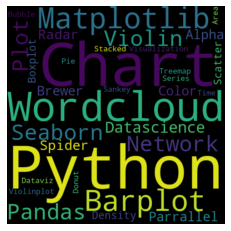

In [12]:
# Libraries
# !pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
# Create a list of word
text=("Python Python Python Matplotlib Matplotlib Seaborn Network Plot Violin Chart Pandas Datascience Wordcloud Spider Radar Parrallel Alpha Color Brewer Density Scatter Barplot Barplot Boxplot Violinplot Treemap Stacked Area Chart Chart Visualization Dataviz Donut Pie Time-Series Wordcloud Wordcloud Sankey Bubble")
 
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


here you can find more ideas of how to make your word cloud look better:
https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery

You can for example print the word cloud in the form wanted. For example:
https://amueller.github.io/word_cloud/auto_examples/frequency.html#sphx-glr-auto-examples-frequency-py